In [4]:
pip install deepface

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 2.3 MB 25.5 MB/s 
     |████████████████████████████████| 462 kB 63.0 MB/s 


In [80]:
from sklearn.datasets import fetch_lfw_people
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

In [30]:
from sklearn.datasets import fetch_lfw_pairs

In [31]:
fetch_lfw_pairs = fetch_lfw_pairs(subset = 'test', color = True, resize = 1)

In [32]:
pairs = fetch_lfw_pairs.pairs
labels = fetch_lfw_pairs.target
target_names = fetch_lfw_pairs.target_names

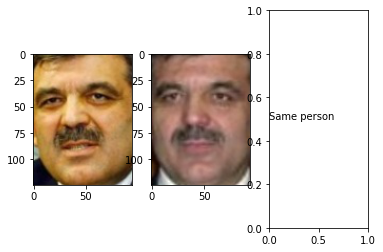

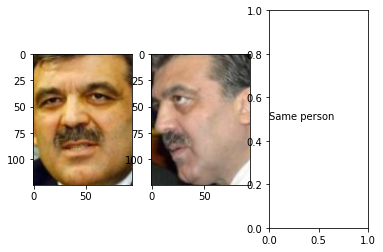

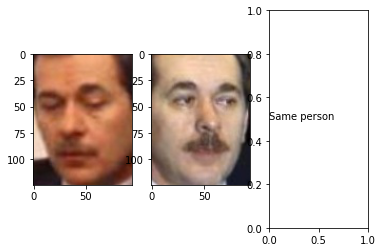

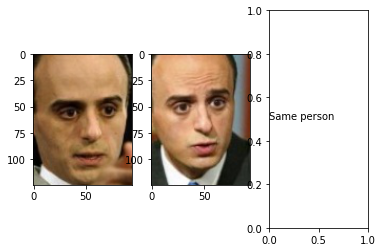

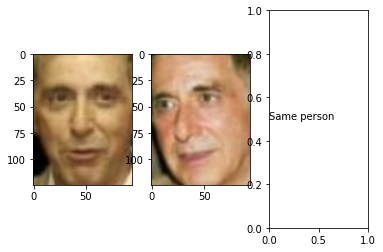

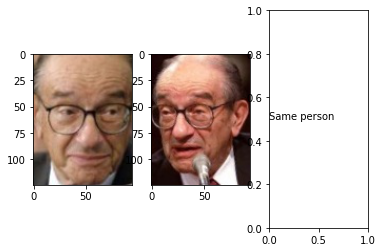

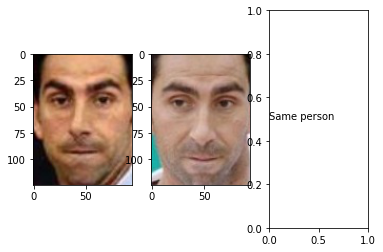

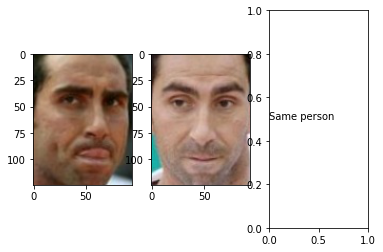

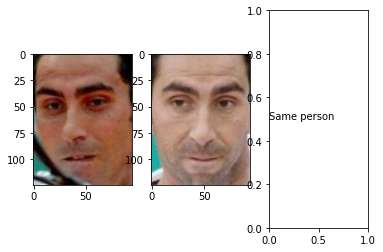

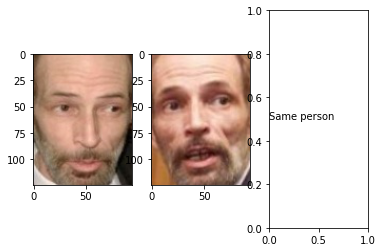

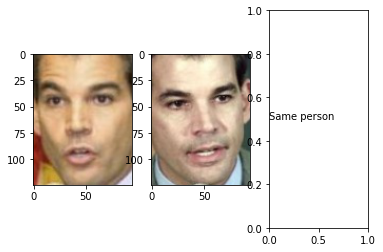

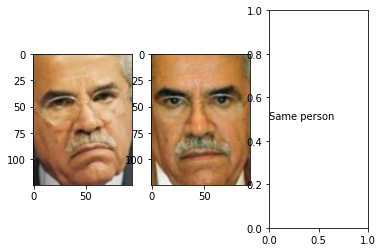

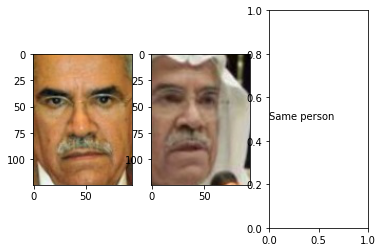

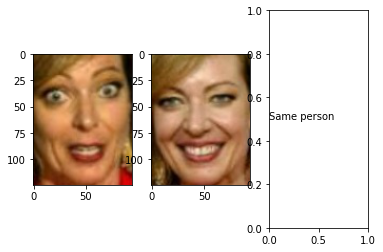

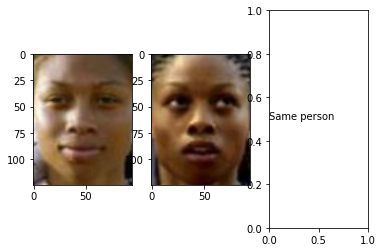

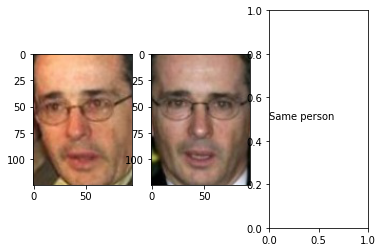

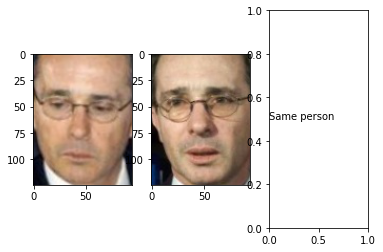

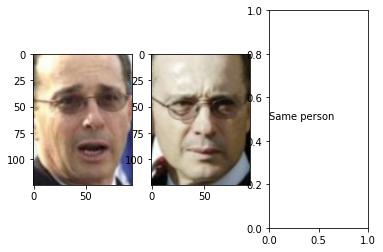

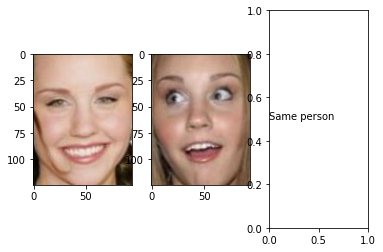

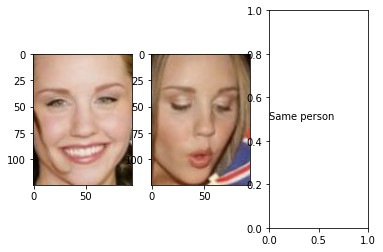

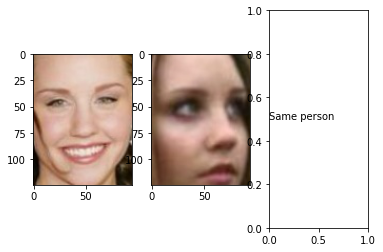

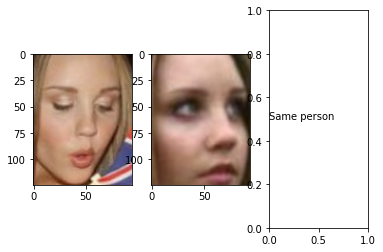

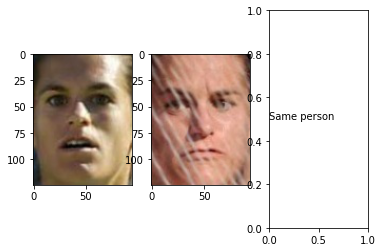

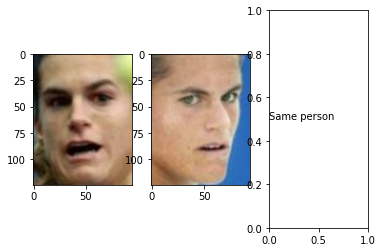

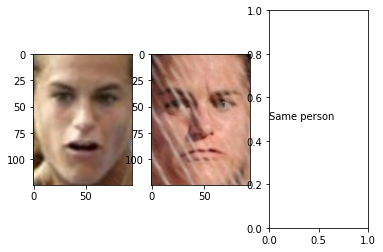

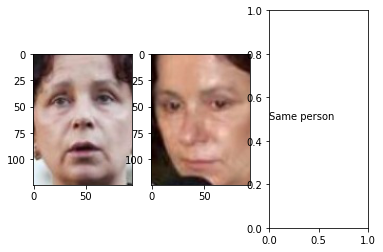

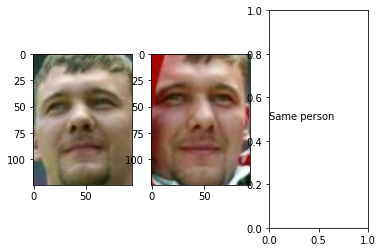

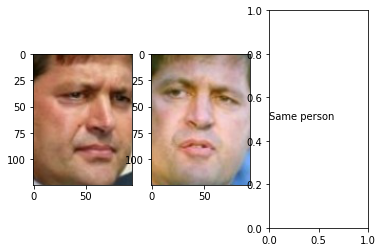

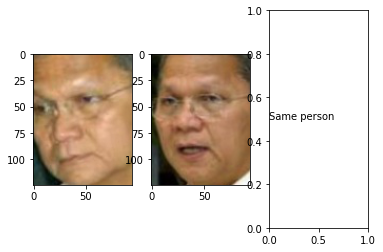

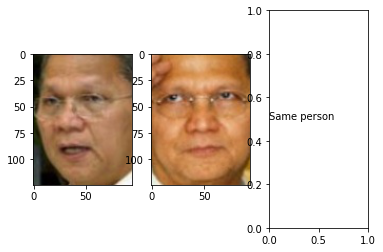

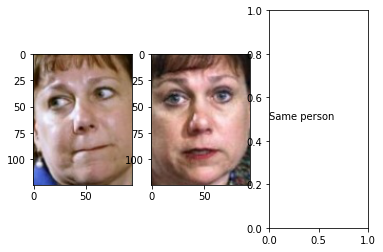

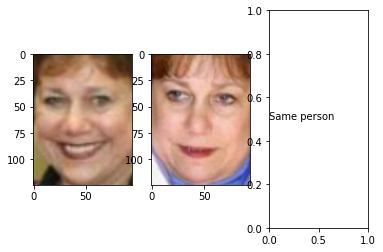

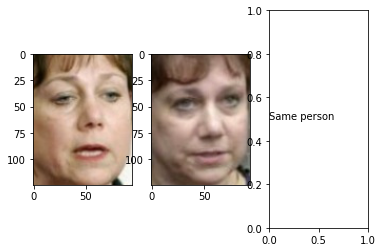

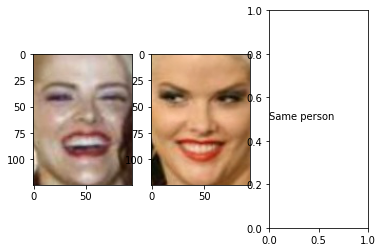

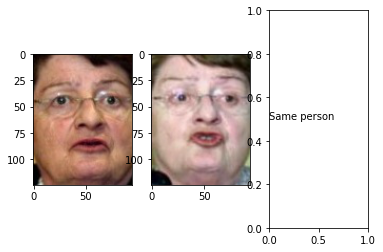

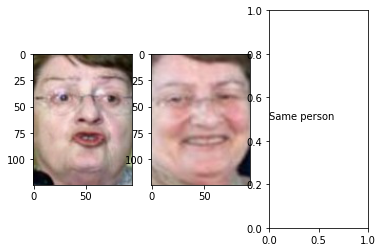

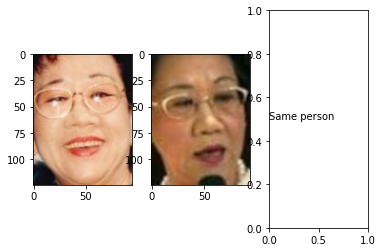

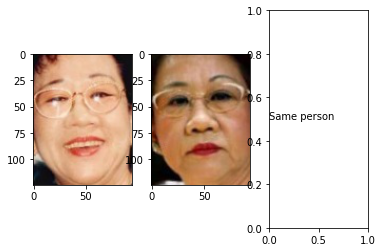

KeyboardInterrupt: ignored

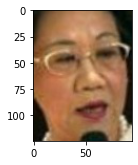

In [33]:
actuals = []; predictions = []
for i in range(0, pairs.shape[0]):
   pair = pairs[i]
   img1 = pair[0]
   img2 = pair[1]
 
   fig = plt.figure()
 
   ax1 = fig.add_subplot(1,3,1)
   plt.imshow(img1/255)
 
   ax2 = fig.add_subplot(1,3,2)
   plt.imshow(img2/255)
 
   ax3 = fig.add_subplot(1,3,3)
   plt.text(0, 0.50, target_names[labels[i]])
 
   plt.show()

In [59]:
#deepface expects bgr instead of rgb
img1 = img1[:,:,::-1]; img2 = img2[:,:,::-1]
result = DeepFace.verify(img1, img2, model_name = 'ArcFace', distance_metric = 'cosine', enforce_detection=False)
distance = result.get('distance')
prediction = result["verified"]
predictions.append(str(prediction) + ", " + str(distance))

actual = True if labels[i] == 1 else False
actuals.append(str(actual) + str(distance))



In [60]:
print(predictions)


[True, True, True, True, True, 'True0.20938078967596785', 'True0.2523508017631546', 'True, 0.20938078967596785']


In [61]:
print(actual)

True


In [119]:
resp = DeepFace.verify(img1, img2, model_name = 'ArcFace', distance_metric = 'cosine', enforce_detection=False)

print(resp)
result = resp.get('verified')
print(result)

{'verified': False, 'distance': 0.9267722282630398, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
False


In [72]:
import itertools

In [143]:
match = []
non_match = []


for i in range(0, pairs.shape[0]):
  pair = pairs[i]
  img1 = pair[0]
  img2 = pair[1]
 
  resp = DeepFace.verify(img1, img2, model_name = 'ArcFace', distance_metric = 'cosine', enforce_detection=False)
  
  result = resp.get('verified')
  distance = resp.get('distance')
  
  if result == True:
    match.append(str(distance))
  
  else:
    non_match.append(str(distance))
    


In [121]:
join = str(match) + " " + str(non_match)

In [123]:
# Write line to file

with open('/test.txt', 'w') as writefile:
    writefile.write(join)

In [144]:
match = str(match)
with open('/match.txt', 'w') as writefile:
    writefile.write(match)

In [145]:
non_match = str(non_match)
with open('/nonmatch.txt', 'w') as writefile:
    writefile.write(non_match)

In [125]:
pip install chefboost

In [146]:
import pandas as pd
import numpy as np
from chefboost import Chefboost as chef

In [153]:
df = pd.read_excel("/result1.xlsx")
print(df)

     Distance   Decision
0    0.206135      Match
1    0.542329      Match
2    0.476367      Match
3    0.312849      Match
4    0.358204      Match
..        ...        ...
995  0.999334  Non Match
996  0.941844  Non Match
997  0.846475  Non Match
998  0.837118  Non Match
999  0.926772  Non Match

[1000 rows x 2 columns]


In [154]:
config = {'algorithm': 'C4.5'}
tmp_df = df[['Distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  1 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.5052111148834229  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  99.5 % on  1000  instances
Labels:  ['Match' 'Non Match']
Confusion matrix:  [[462, 5], [0, 533]]
Precision:  98.9293 %, Recall:  100.0 %, F1:  99.4618 %
